### Write A Data Science Blog Post - 
### How to find your next adventure destination...with a bit of data crunching and visualization

#### Intro
I'm a Belgian expatriate living in Chile since 2016. I envoy travelling through this amazing country full of remote places and
pristine nature. I'll analyze the public data provided by the Chilean government and forest organization to gain insights on the national parks and their visitors. The main goal will be to identify parks I didn't already visited and parks to recommend to people willing to visit Chile.

#### Questions to answer
Let's ask 3 questions about the places to visit in Chile answer them with the data :
- Is the tourism in Chile really rising as much as I think?
- Which are the national parks prefered by tourists ?
- Wich are the national parks that Chileans know but tourists don't ?

## Step 1 : gather
We first look for information and statistics about the tourism industry in Chile, public resources and datasets are available on :
- The website of the "Servicio Nacional de Turismo" : https://www.sernatur.cl/
- The website of the "Corporación Nacional Forestal" in charge of the National Parks: http://www.conaf.cl/
- The website of the "Subsecretaria de Turismo" in charge of the development of the turistic activities in Chile: http://www.subturismo.gob.cl

Then select the following datasets :
- The listing of the tourist suppliers registered by Sernatur
- The statistics of visits in the national parks managed by Conaf
- The statistics of km2 of national parks managed by Conaf
- Statistics of foreign visitors in Chile, provided by the Subsecretaria de Turismo

In [1]:
# Import libraries
import pandas as pd
import scipy as scipy
from scipy import io
import matplotlib.pyplot as plt
import seaborn as sns

# For map plotting
import folium
import os
import numpy as np
import bokeh
import geopandas as gpd
from branca.colormap import LinearColormap
from folium.plugins import FastMarkerCluster
from folium import plugins

In [ ]:
pd.read_excel('/Conaf global.xlsx')

In [2]:
# Loading files
# the conaf files were registered in Pdf and year by year. They have been merged in excel before the upload
# the foreigners by month and by region files have been merged in excel before upload
conaf_parks = pd.read_excel('Conaf global.xlsx')
sernatur_suppliers = pd.read_excel('Sernatur DB.xlsx')
foreigners_monthly = pd.read_excel('Foreigners by month Conso.xlsx')
foreigners_region = pd.read_excel('Foreigners by region Conso 1.xlsx')
creation_parks = pd.read_excel('Creation Parks.xlsx')
visitas_parks = pd.read_excel('Visitas Totales Conaf.xlsx')

In [3]:
# data from World Bank for population and wikipedia for the area
pop_chile = 18050000
pop_belgium = 11350000
area_chile = 756950
area_belgium = 30688
dens_pob_chile = pop_chile/area_chile
dens_pob_belgium = pop_belgium/area_belgium
print('Density of poblation in Chile : {} inhabitants by km2'.format(round(dens_pob_chile,1)))
print('Density of poblation in Belgium : {} inhabitants by km2'.format(round(dens_pob_belgium,1)))
print('Belgium poblation density is {} times the Chilean one'.format(round(dens_pob_belgium/dens_pob_chile,1)))

Density of poblation in Chile : 23.8 inhabitants by km2
Density of poblation in Belgium : 369.9 inhabitants by km2
Belgium poblation density is 15.5 times the Chilean one


## Step 2 : Assess & Step 3 : Clean
This step has been mainly done in Excel and in PowerBi before the upload to the Jupyter Notebook
Steps done in order to assess and clean the data :
- Use of a PDF to Excel extractor
- Check the null values
- Check of the NaN
- Check that the total columns matched the subtotals (e.g. : Chilenos + Extranjeros = Total)
- Standardization of the parks names between files
- Add column with the type of park extracted from the name column
- Latitud and Longitud of the parks added from data available on Google Maps
- Visualization in Power BI to identify :
    - outliers
    - variations between year
    - Geographic repartition of the parks
    - Number of parks
    - Total visits by year (by Foreigners and by Locals)
    - ...
    
An additional check has been done in the Jupyter notebook, for the sake of the lenght of the notebook I only kept the check made for the file "conaf parks" (the same logic has been followed for the other files and no major data cleaning has been needed after the assessment)

In [4]:
# check the structure of the DataFrame and the information available
conaf_parks.head()

,Date,Año,Región,Region,Latitud,Longitud,Tipo,Tipo.1,Unidad SNASPE,Chilenos,Extranjeros,Menores,Adultos,A.Mayor,Masculino,Femenino,Discapacit.,TOTAL
0,2016-01-01,2016,X,Los Lagos,-41.173,-72.448,P.N.,Parque Nacional,VICENTE PÉREZ ROSALES,387760,158651,83374,354909,108128,266610,279801,96,546411
1,2017-01-01,2017,X,Los Lagos,-41.173,-72.448,P.N.,Parque Nacional,VICENTE PÉREZ ROSALES,387411,149796,81699,344508,111000,252895,284312,163,537207
2,2017-01-01,2017,II,Antofagasta,-23.234,-67.657,R.N.,Reserva Nacional,LOS FLAMENCOS,221579,310227,58835,431738,41233,246802,285004,9,531806
3,2009-01-01,2009,X,Los Lagos,-40.678,-72.112,P.N.,Parque Nacional,PUYEHUE,325991,173138,124782,374347,0,225466,273663,0,499129
4,2015-01-01,2015,X,Los Lagos,-41.173,-72.448,P.N.,Parque Nacional,VICENTE PÉREZ ROSALES,348228,120295,46245,355949,66329,235247,233276,40,468523


In [27]:
# Looking for null values
conaf_parks.isnull().sum().sum()

32

In [28]:
# Validation of the datatype for each column
conaf_parks.dtypes

Date             datetime64[ns]
Año                       int64
Región                   object
Region                   object
Latitud                 float64
Longitud                float64
Tipo                     object
Tipo.1                   object
Unidad SNASPE            object
Chilenos                  int64
Extranjeros               int64
Menores                   int64
Adultos                   int64
A.Mayor                   int64
Masculino                 int64
Femenino                  int64
Discapacit.               int64
TOTAL                     int64
% Extranjeros           float64
dtype: object

## Step 4 : Model

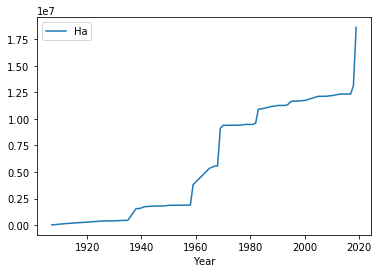

In [5]:
# Increase of km2 of protected areas
creation_parks['Year'] = creation_parks['Fecha de Creación'].map(lambda x: x.year)
creation_parks.groupby(['Year']).sum().cumsum().plot()

In [ ]:
# The lasts territories added as national parks have been extensively commented in the press 
# Donation by the Tompkins of the Parque Patagonia et Parque Pumalin
# In 2019 Chile added a new one : 

In [6]:
# Total of National parks ha in 2019
creation_parks.groupby(['Year']).sum().cumsum().max()

Ha    18616755.67
dtype: float64

In [7]:
# % of national parks (and conversion ha to km2)
creation_parks.groupby(['Year']).sum().cumsum().max()/756950/100

Ha    0.245944
dtype: float64

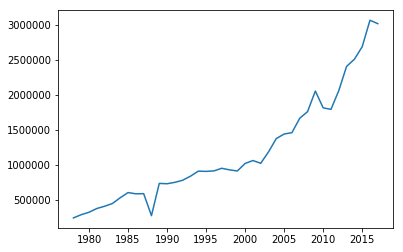

In [8]:
#Increase of visits in the natural parks in Chile
plt.plot(visitas_parks['AÑO'],visitas_parks['NÚMERO DE VISITANTES'])

In [9]:
# max number of visitors in national parks : 3,07 M in 2016
visitas_parks['NÚMERO DE VISITANTES'].max()

3068184

In [30]:
# Validate the the other file with other details contains the same total
conaf_parks[conaf_parks['Año']==2016]['TOTAL'].sum()

3068184

In [10]:
# Number of Chilean visitors in 2017
conaf_parks[conaf_parks['Año']==2017]['Chilenos'].sum()

2156540

In [11]:
# Calculate the average number of visits that a Chilean does to a National park by year
print('Total visits : {}'.format(conaf_parks[conaf_parks['Año']==2017]['Chilenos'].sum()))
print('Average by Chilean : {}'.format(conaf_parks[conaf_parks['Año']==2017]['Chilenos'].sum()/18050000))
# Chilean loves their nature, but they don't visit that often the parks, 10% of Chileans visit a national park every year.

Total visits : 2156540
Average by Chilean : 0.11947590027700832


In [61]:
# Parks with more visitors
conaf_parks[conaf_parks['Año']==2017][['TOTAL','Unidad SNASPE']].sort_values(by=['TOTAL'],ascending=False).head(3)

,TOTAL,Unidad SNASPE
1,537207,VICENTE PÉREZ ROSALES
2,531806,LOS FLAMENCOS
12,264800,TORRES DEL PAINE


In [65]:
# Total of visitors in these 3 parks
conaf_parks[conaf_parks['Año']==2017][['TOTAL']].sort_values(by=['TOTAL'],ascending=False).head(3).sum()

TOTAL    1333813
dtype: int64

In [66]:
# Count of parks in 2017
conaf_parks[conaf_parks['Año']==2017][['TOTAL']].count()

TOTAL    86
dtype: int64

In [64]:
# % of visitors in 3 main parks on the total of visitors in all the parks
conaf_parks[conaf_parks['Año']==2017][['TOTAL']].sort_values(by=['TOTAL'],ascending=False).head(3).sum()/conaf_parks[conaf_parks['Año']==2017][['TOTAL']].sum()

TOTAL    0.441743
dtype: float64

In [13]:
# What are the places that have a high proportion of Foreign visitors
conaf_parks['% Extranjeros'] = conaf_parks['Extranjeros']/conaf_parks['TOTAL']
conaf_parks[conaf_parks['Año']==2017][['% Extranjeros','Unidad SNASPE']].sort_values(by=['% Extranjeros'],ascending=False).head(11)
#These places requires to take an internal flight (and a travel agency or tour)
#Foreigners can afford to visit the most remote places 
# while the average chilean salary is 433USD in 2019 (the price of a cheap flight to Easter Island (Rapa Nui from Santiago)

,% Extranjeros,Unidad SNASPE
419,0.933360,CABO DE HORNOS
190,0.820032,LOS PINGÜINOS
767,0.769231,BERNARDO O HIGGINS
621,0.697121,SALAR DE SURIRE
658,0.677481,LAS VICUÑAS
272,0.646851,RÍO SIMPSON
2,0.583346,LOS FLAMENCOS
490,0.570041,ALACALUFES
12,0.569569,TORRES DEL PAINE
162,0.456167,BERNARDO O HIGGINS


In [17]:
# Create map object for parks most visited by tourists
map = folium.Map(location=[-40, -70],zoom_start=4,tiles='Stamen Terrain')
for i in range(0,len(conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']>=0.42)])):
    folium.Marker(location=[conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']>=0.42)]['Latitud'].tolist()[i],
                        conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']>=0.42)]['Longitud'].tolist()[i]]).add_to(map)
map

In [34]:
conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']>=0.42)]

,Date,Año,Región,Region,Latitud,Longitud,Tipo,Tipo.1,Unidad SNASPE,Chilenos,Extranjeros,Menores,Adultos,A.Mayor,Masculino,Femenino,Discapacit.,TOTAL,% Extranjeros
2,2017-01-01,2017,II,Antofagasta,-23.234,-67.657,R.N.,Reserva Nacional,LOS FLAMENCOS,221579,310227,58835,431738,41233,246802,285004,9,531806,0.583346
12,2017-01-01,2017,XII,Magallanes y de la Antártica Chilena,-50.942,-73.407,P.N.,Parque Nacional,TORRES DEL PAINE,113978,150822,17724,223738,23338,132957,131843,2106,264800,0.569569
100,2017-01-01,2017,O.C.,Isla de Pascua,-27.124,-109.342,P.N.,Parque Nacional,RAPA NUI,35003,25853,5241,52195,3420,27989,32867,121,60856,0.424823
162,2017-01-01,2017,XII,Magallanes y de la Antártica Chilena,-49.797,-74.485,P.N.,Parque Nacional,BERNARDO O HIGGINS,19274,16167,1225,26385,7831,17539,17902,13,35441,0.456167
190,2017-01-01,2017,XII,Magallanes y de la Antártica Chilena,-52.919,-70.579,M.N.,Monumento Nacional,LOS PINGÜINOS,4634,21115,1054,16175,8520,12359,13390,56,25749,0.820032
272,2017-01-01,2017,XI,Aysén,-45.557,-72.325,R.N.,Reserva Nacional,RÍO SIMPSON,4895,8966,1836,7543,4482,7124,6737,61,13861,0.646851
419,2017-01-01,2017,XII,Magallanes y de la Antártica Chilena,-55.666,-67.660,P.N.,Parque Nacional,CABO DE HORNOS,334,4678,120,2496,2396,2521,2491,0,5012,0.933360
490,2017-01-01,2017,XII,Magallanes y de la Antártica Chilena,-52.509,-73.806,R.N.,Reserva Nacional,ALACALUFES,1151,1526,128,1653,896,1338,1339,0,2677,0.570041
621,2017-01-01,2017,XV,Arica y Parinacota,-18.828,-69.095,M.N.,Monumento Nacional,SALAR DE SURIRE,242,557,14,722,63,450,349,0,799,0.697121
658,2017-01-01,2017,XV,Arica y Parinacota,-18.640,-69.200,R.N.,Reserva Nacional,LAS VICUÑAS,169,355,2,488,34,294,230,0,524,0.677481


In [31]:
# Create map object for parks with less than 6% foreigners and with a minimum of 20.000 visitors
map1 = folium.Map(location=[-40, -70],zoom_start=4,tiles='Stamen Terrain')
for i in range(0,len(conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']<=0.06)&(conaf_parks['TOTAL']>=20000)&(conaf_parks['Tipo']=='P.N.')])):
    folium.Marker(location=[conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']<=0.06)&(conaf_parks['TOTAL']>=20000)&(conaf_parks['Tipo']=='P.N.')]['Latitud'].tolist()[i],
                        conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']<=0.06)&(conaf_parks['TOTAL']>=20000)&(conaf_parks['Tipo']=='P.N.')]['Longitud'].tolist()[i]]).add_to(map1)
map1

In [33]:
conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['% Extranjeros']<=0.06)&(conaf_parks['TOTAL']>=20000)&(conaf_parks['Tipo']=='P.N.')]

,Date,Año,Región,Region,Latitud,Longitud,Tipo,Tipo.1,Unidad SNASPE,Chilenos,Extranjeros,Menores,Adultos,A.Mayor,Masculino,Femenino,Discapacit.,TOTAL,% Extranjeros
61,2017-01-01,2017,IX,Araucanía,-38.691,-71.674,P.N.,Parque Nacional,CONGUILLIO,88267,4705,23672,65586,3714,48683,44289,693,92972,0.050607
80,2017-01-01,2017,VIII,Concepción,-37.385,-71.378,P.N.,Parque Nacional,LAGUNA DEL LAJA,75783,470,21484,53676,1093,43575,32678,0,76253,0.006164
124,2017-01-01,2017,V,Valparaíso,-32.955,-71.081,P.N.,Parque Nacional,LA CAMPANA,48279,1830,11318,37598,1193,27489,22620,1,50109,0.036520
217,2017-01-01,2017,IX,Araucanía,-37.792,-72.998,P.N.,Parque Nacional,NAHUELBUTA,20817,269,3294,17046,746,10947,10139,650,21086,0.012757


In [38]:
# Finally the list of protected areas that have received less than 4000 visitors by year
conaf_parks[(conaf_parks['Año']==2017)&(conaf_parks['TOTAL']<4000)]['Unidad SNASPE'].unique()
# Some of them are unknown to me so I will mention in the article a selection of 5 of them.

array([' ARCHIPIELAGO DE JUAN FERNÁNDEZ', ' LAGO JEINIMENI',
       ' VILLARICA SECTOR SUR', ' PALI AIKE', ' CERRO CASTILLO',
       ' FUTALEUFÚ', ' ALACALUFES', ' ALERCE COSTERO', ' LAS CHINCHILLAS',
       ' DOS LAGUNAS', ' MOCHO-CHOSHUENCO', ' ISLOTES DE PUÑIHUIL',
       ' EL YALI', ' NEVADO DE TRES CRUCES', ' ISLA MOCHA', ' HORNOPIRÉN',
       ' VILLARRICA', ' RALCO', ' SALAR DE SURIRE',
       ' LOS BELLOTOS DEL MELADO', ' LOS HUEMULES DE NIBLINTO',
       ' LAS VICUÑAS', ' ALTOS DE PEMEHUE', ' VOLCAN ISLUGA',
       ' LOS QUEULES', ' CERRO HUEMULES', ' TRAPANANDA',
       ' ROBLERÍA DEL COBRE DE LONCHA', ' ALTO BÍO - BÍO',
       ' BERNARDO O HIGGINS', ' CHINA MUERTA', ' MALLECO', ' NALCAS',
       ' LLANQUIHUE', ' ISLA MAGDALENA'], dtype=object)

In [39]:
# An additional analysis has been started on the tourist insfrastructure, hotels, and services.
# Given the main subject of the blog post I will not include this part but a lot of valuable information is provided by the Sernatur

In [40]:
# Structure of the DataBase
sernatur_suppliers.head()

,Tipo de Servicio,Región,Provincia,Comuna,Localidad,Dirección,Rut del Prestador,DV,Tipo de Empresa,Nombre o Razon Social,...,Sello Q,Calificacion Sello Q,Fecha expiración Sello Q,Número de Registro,Estado Inspeccion,Fecha Inspeccion,Tiene sello S,Fecha Termino Sello S,Clase Turismo Aventura,Clase Agencia
0,Alojamiento Turístico,Tarapacá,IQUIQUE,IQUIQUE,IQUIQUE,Baquedano 1408 ZONA TÍPICA BOULEVARD BAQUEDANO...,Dato Protegido,Dato Protegido,Persona Natural,Alejandra Veloso Reyes,...,Sin sello Q,-,-,24781,Cumple Inspeccion,2016-10-21 00:00:00,-,-,-,-
1,Alojamiento Turístico,Tarapacá,IQUIQUE,IQUIQUE,IQUIQUE,Luis Uribe 445. Of. 1 -,76250627,0,Persona Jurídica,Constructora e Inmobiliaria Juan Lopez Limitada,...,Sin sello Q,-,-,17348,Cumple Inspeccion,2014-09-24 00:00:00,-,-,-,-
2,Alojamiento Turístico,Tarapacá,IQUIQUE,IQUIQUE,IQUIQUE,GENARO GALLO 865 -,76179873,1,Persona Jurídica,SOCIEDAD DE INVERSIONES ALBANO Y MARIANO LIMITADA,...,Sin sello Q,-,-,11376,Cumple Inspeccion,2017-12-15 00:00:00,-,-,-,-
3,Alojamiento Turístico,Tarapacá,IQUIQUE,IQUIQUE,IQUIQUE,Genaro Gallo 1483 -,76310667,5,Persona Jurídica,SOCIEDAD COMERCIAL ALTOS DEL NORTE SpA,...,Sin sello Q,-,-,31182,Cumple Inspeccion,2018-09-07 00:00:00,-,-,-,-
4,Alojamiento Turístico,Tarapacá,IQUIQUE,IQUIQUE,IQUIQUE,bolivar 752 -,Dato Protegido,Dato Protegido,Persona Natural,Julieta Pérez Yáñez,...,Sin sello Q,-,-,19089,Cumple Inspeccion,2016-09-26 00:00:00,-,-,-,-


In [41]:
# Information available
sernatur_suppliers.columns.tolist()

['Tipo de Servicio',
 'Región',
 'Provincia',
 'Comuna',
 'Localidad',
 'Dirección',
 'Rut del Prestador',
 'DV',
 'Tipo de Empresa',
 'Nombre o Razon Social',
 'Teléfono',
 'Web',
 'Email',
 'Representante(s) Legal(es)',
 'Nombre de Fantasía (Servicio)',
 'Clase Alojamiento',
 'Fecha Registro',
 'Estado de Registro',
 'Sello Q',
 'Calificacion Sello Q',
 'Fecha expiración Sello Q',
 'Número de Registro ',
 'Estado Inspeccion',
 'Fecha Inspeccion',
 'Tiene sello S',
 'Fecha Termino Sello S',
 'Clase Turismo Aventura',
 'Clase Agencia']

In [42]:
# Count of suppliers by type of Services
sernatur_suppliers['Tipo de Servicio'].value_counts()

Alojamiento Turístico                                 8694
Restaurantes y Similares                              2910
Agencias de Viaje y Tour Operador                     2497
Turismo Aventura                                      2429
Guías de Turismo                                      1840
Artesanía                                              591
Taxis y Buses de Turismo                               546
Servicios de Esparcimiento                             480
Transporte de Pasajeros por Carretera Interurbana      311
Arriendo de Vehículo                                   264
Transporte de Pasajeros al Aeropuerto                  227
Transporte de Pasajeros por Vía Marítima               141
Servicios Deportivos                                    68
Transporte de Pasajeros por Vía Aérea                   15
Transporte de Pasajeros por Ferrocarril                  2
Teleférico y Funiculares                                 1
Name: Tipo de Servicio, dtype: int64

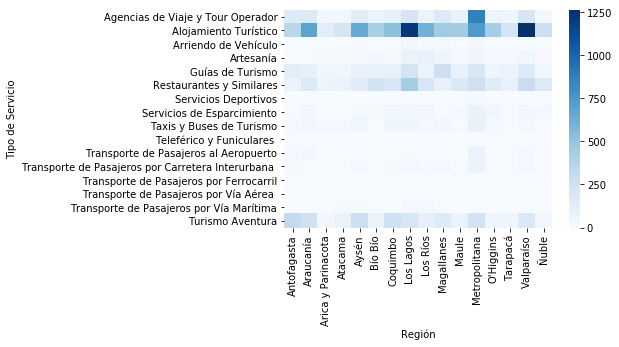

In [43]:
# Suppliers by region and by type
sns.heatmap(sernatur_suppliers[['Tipo de Servicio','Región']].pivot_table(index='Tipo de Servicio', columns='Región', 
                        aggfunc=len, fill_value=0),cmap="Blues")
# A lot of Hotels (with peaks In the regions of Los Lagos and Valparaiso)
# A concentration of the travel agencies in the area of Santiago (Metropolitana) 

In [44]:
# Regions with a good supply of Adventure and Sports services
sernatur_suppliers[sernatur_suppliers['Tipo de Servicio'].isin(['Turismo Aventura','Servicios Deportivos'])]['Región'].value_counts()

Antofagasta           326
Aysén                 269
Coquimbo              260
Araucanía             252
Metropolitana         251
Los Lagos             213
Valparaíso            186
Magallanes            173
Los Ríos              109
Atacama                90
Maule                  85
Bío Bío                75
Tarapacá               65
O'Higgins              60
Arica y Parinacota     42
Ñuble                  41
Name: Región, dtype: int64

In [45]:
# Regions with a good supply Handcrafts
sernatur_suppliers[sernatur_suppliers['Tipo de Servicio']=='Artesanía']['Región'].value_counts().head()

Los Ríos         97
Los Lagos        87
Metropolitana    62
Magallanes       59
Valparaíso       53
Name: Región, dtype: int64

In [48]:
# Regions with travel agencies
sernatur_suppliers[sernatur_suppliers['Tipo de Servicio']=='Agencias de Viaje y Tour Operador']['Región'].value_counts().head()

Metropolitana    871
Los Lagos        209
Valparaíso       207
Magallanes       173
Araucanía        170
Name: Región, dtype: int64

In [49]:
# Regions with local guides
sernatur_suppliers[sernatur_suppliers['Tipo de Servicio']=='Guías de Turismo']['Región'].value_counts().head()

Magallanes       270
Los Lagos        223
Metropolitana    198
Valparaíso       165
Antofagasta      131
Name: Región, dtype: int64

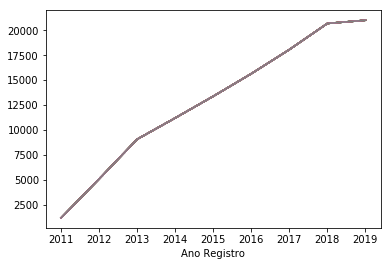

In [59]:
# Evolution of the touristic offer
sernatur_suppliers['Ano Registro'] = sernatur_suppliers['Fecha Registro'].map(lambda x: x.year)
sernatur_suppliers.groupby(['Ano Registro']).count().cumsum().plot(legend=None)

## Step 5 : Visualize

The visualization have been created in Python (cf. supra.) but for the article some visualization done in Power BI will be used

### Find the blog article on medium : "How to find your next adventure destination…
### …with a bit of data crunching and visualization"